In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
stock = pd.read_csv('/content/drive/My Drive/datasets/toronto.csv')

In [4]:
stock=stock.drop('Date',axis =1)

In [5]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume
0,8961.799805,8961.799805,8611.500000,8611.500000,8611.500000,69042300
1,8582.299805,8937.799805,8487.700195,8937.799805,8937.799805,116327600
2,8948.299805,8965.400391,8893.900391,8905.700195,8905.700195,130402800
3,8838.299805,8863.099609,8690.200195,8690.200195,8690.200195,93476000
4,8681.599609,8683.400391,8577.200195,8671.700195,8671.700195,80755800


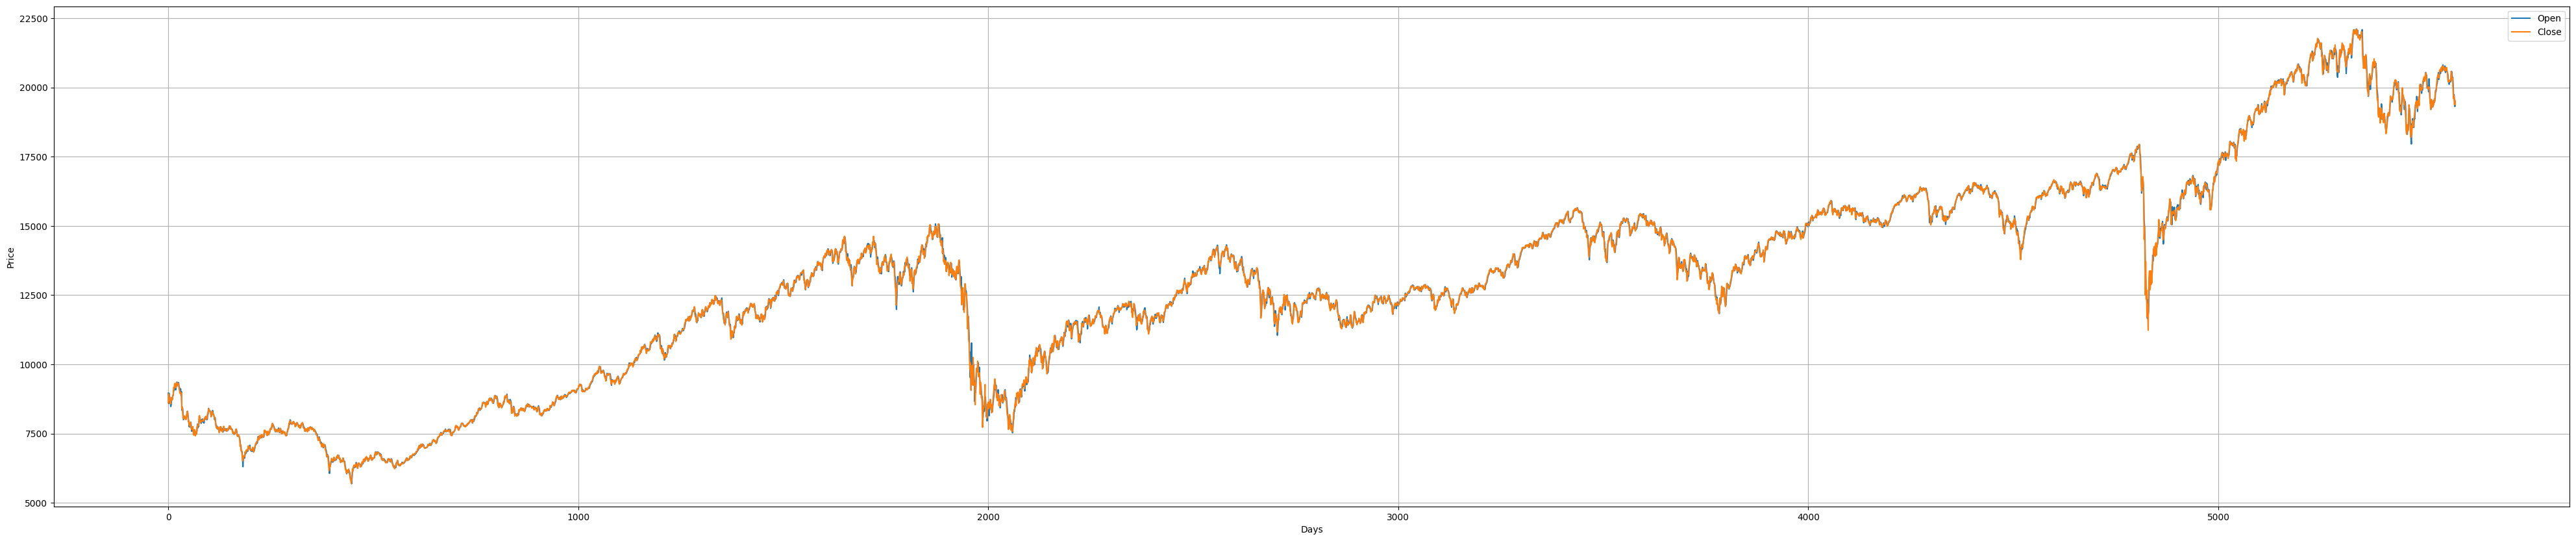

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
from google.colab import files
fig = plt.figure(figsize =(50, 10))
plt.plot(stock["Open"])
plt.plot(stock["Close"])
plt.legend(['Open','Close'])
plt.grid(True)
plt.xlabel("Days")
plt.ylabel("Price")
plt.rcParams["font.size"] = "16"
plt.show()

fig.savefig("dataset.pdf")
files. download("dataset.pdf")


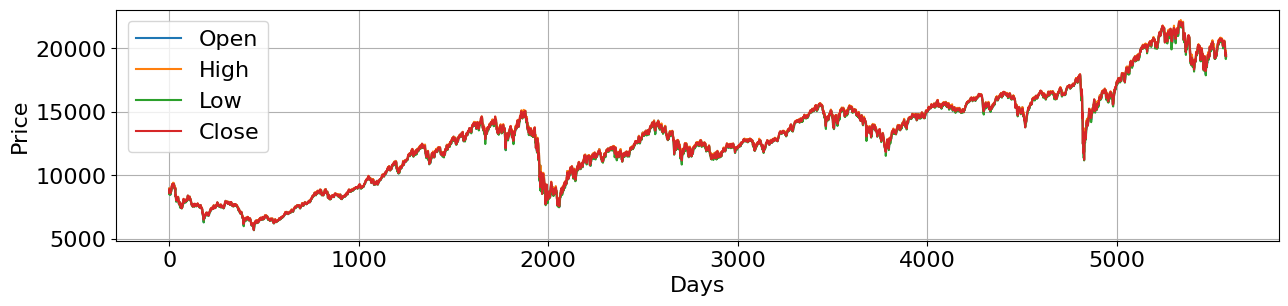

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
fig = plt.figure(figsize =(15, 3))
plt.plot(stock["Open"])
plt.plot(stock["High"])
plt.plot(stock["Low"])
plt.plot(stock["Close"])
plt.legend(['Open','High','Low','Close'])
plt.grid(True)
plt.xlabel("Days")
plt.ylabel("Price")
plt.rcParams["font.size"] = "16"
plt.show()

fig.savefig("dataset full.pdf")
files. download("dataset full.pdf")

In [8]:
#fig = plt.figure(figsize =(15, 3))
#plt.plot(df.["open"])
#plt.plot(df.["high"])
#plt.plot(df.["low"])
#plt.plot(df.["close"])
#plt.legend(['open','high','low','close'])
#plt.grid(True)
#plt.xlabel("Days")
#plt.ylabel("Price")
#plt.rcParams["font.size"] = "16"
#plt.show()
#fig.savefig("dataset.eps")

In [9]:
stock.head(10)
print("instances and Features: ",stock.shape)      #Rows and columns

instances and Features:  (5579, 6)


In [10]:
stock.info()   #Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5579 entries, 0 to 5578
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5579 non-null   float64
 1   High       5579 non-null   float64
 2   Low        5579 non-null   float64
 3   Close      5579 non-null   float64
 4   Adj Close  5579 non-null   float64
 5   Volume     5579 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 261.6 KB


In [11]:
stock['target']=np.nan    #First we have to assign the target column from the dataset.For that, we created a nan values column in the datset.

In [12]:
stock.target            # shows the rows of target column

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5574   NaN
5575   NaN
5576   NaN
5577   NaN
5578   NaN
Name: target, Length: 5579, dtype: float64

In [13]:
stock.Close  #Fill that nan column with closing price column of data.As, we are interested in predicting the trend of closing price.

0        8611.500000
1        8937.799805
2        8905.700195
3        8690.200195
4        8671.700195
            ...     
5574    19588.900390
5575    19694.199220
5576    19378.800780
5577    19539.000000
5578    19387.699220
Name: Close, Length: 5579, dtype: float64

In [14]:
stock

,Open,High,Low,Close,Adj Close,Volume,target
0,8961.799805,8961.799805,8611.500000,8611.500000,8611.500000,69042300,NaN
1,8582.299805,8937.799805,8487.700195,8937.799805,8937.799805,116327600,NaN
2,8948.299805,8965.400391,8893.900391,8905.700195,8905.700195,130402800,NaN
3,8838.299805,8863.099609,8690.200195,8690.200195,8690.200195,93476000,NaN
4,8681.599609,8683.400391,8577.200195,8671.700195,8671.700195,80755800,NaN
...,...,...,...,...,...,...,...
5574,19645.500000,19714.199220,19427.500000,19588.900390,19588.900390,356349500,NaN
5575,19732.900390,19850.599610,19562.300780,19694.199220,19694.199220,297283300,NaN
5576,19533.000000,19533.000000,19179.400390,19378.800780,19378.800780,387722500,NaN
5577,19311.300780,19589.400390,19155.800780,19539.000000,19539.000000,337397200,NaN


In [15]:
import pandas as pd
print(stock.isnull().sum())

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
target       5579
dtype: int64


In [16]:
for i in range(1,len(stock)):
  if(stock.Close[i]>stock.Close[i-1]):
     stock.target[i]=1
  elif(stock.Close[i]<stock.Close[i-1]):
     stock.target[i]=0
  else:
     stock.target[i]=stock.target[i-1]
     print(stock.target[i-1],stock.target[i])
     #stock.target.append(target[-1])     #Apend trend[-1] instead of a-1 to repeat same trend either high or low to coming variable based upon previous variable trend.

<ipython-input-16-fe22f4c38abd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock.target[i]=1
<ipython-input-16-fe22f4c38abd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock.target[i]=0


1.0 1.0
1.0 1.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0


<ipython-input-16-fe22f4c38abd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock.target[i]=stock.target[i-1]


In [17]:
import pandas as pd
print(stock.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
target       1
dtype: int64


In [18]:
stock=stock.fillna(0)

In [19]:
print(stock.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
target       0
dtype: int64


In [20]:
stock.head

<bound method NDFrame.head of               Open          High           Low         Close     Adj Close  \
0      8961.799805   8961.799805   8611.500000   8611.500000   8611.500000   
1      8582.299805   8937.799805   8487.700195   8937.799805   8937.799805   
2      8948.299805   8965.400391   8893.900391   8905.700195   8905.700195   
3      8838.299805   8863.099609   8690.200195   8690.200195   8690.200195   
4      8681.599609   8683.400391   8577.200195   8671.700195   8671.700195   
...            ...           ...           ...           ...           ...   
5574  19645.500000  19714.199220  19427.500000  19588.900390  19588.900390   
5575  19732.900390  19850.599610  19562.300780  19694.199220  19694.199220   
5576  19533.000000  19533.000000  19179.400390  19378.800780  19378.800780   
5577  19311.300780  19589.400390  19155.800780  19539.000000  19539.000000   
5578  19493.000000  19493.000000  19298.000000  19387.699220  19387.699220   

         Volume  target  
0      

In [21]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,target
0,8961.799805,8961.799805,8611.500000,8611.500000,8611.500000,69042300,0.0
1,8582.299805,8937.799805,8487.700195,8937.799805,8937.799805,116327600,1.0
2,8948.299805,8965.400391,8893.900391,8905.700195,8905.700195,130402800,0.0
3,8838.299805,8863.099609,8690.200195,8690.200195,8690.200195,93476000,0.0
4,8681.599609,8683.400391,8577.200195,8671.700195,8671.700195,80755800,0.0


In [22]:
stock.target

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
5574    0.0
5575    1.0
5576    0.0
5577    1.0
5578    0.0
Name: target, Length: 5579, dtype: float64

In [23]:
y=stock.target

In [24]:
y.shape

(5579,)

In [25]:
stock=stock.fillna(0)

In [26]:
stock

,Open,High,Low,Close,Adj Close,Volume,target
0,8961.799805,8961.799805,8611.500000,8611.500000,8611.500000,69042300,0.0
1,8582.299805,8937.799805,8487.700195,8937.799805,8937.799805,116327600,1.0
2,8948.299805,8965.400391,8893.900391,8905.700195,8905.700195,130402800,0.0
3,8838.299805,8863.099609,8690.200195,8690.200195,8690.200195,93476000,0.0
4,8681.599609,8683.400391,8577.200195,8671.700195,8671.700195,80755800,0.0
...,...,...,...,...,...,...,...
5574,19645.500000,19714.199220,19427.500000,19588.900390,19588.900390,356349500,0.0
5575,19732.900390,19850.599610,19562.300780,19694.199220,19694.199220,297283300,1.0
5576,19533.000000,19533.000000,19179.400390,19378.800780,19378.800780,387722500,0.0
5577,19311.300780,19589.400390,19155.800780,19539.000000,19539.000000,337397200,1.0


In [27]:
y=stock.target

In [28]:
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [29]:
 # and notice here is : shows all rows while [-1] shows last column from right side.
Drop = ['Close', 'target']  #We need to remove both columns because input x must not contain target column and added target column.
X=stock.drop(Drop,axis = 1) #We cannot remove two columns at a time using drop command
# y=stock.iloc[:,[-1]]

In [30]:
y.shape

(5579,)

In [31]:
X.head(1)

,Open,High,Low,Adj Close,Volume
0,8961.799805,8961.799805,8611.5,8611.5,69042300


In [32]:
# Install imbalanced-learn library if not already installed
# pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

# Count the class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(y))

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

# Count the class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y))


Class distribution before SMOTE: Counter({1.0: 3034, 0.0: 2545})
Class distribution after SMOTE: Counter({0.0: 3034, 1.0: 3034})


Machine learning Classifiers

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [34]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
# from sklearn.metrics import
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
import time
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [35]:
import time
from sklearn.model_selection import train_test_split
start = time.time()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
close = time.time()
split_time = close -start
print("split_time =",split_time)

split_time = 0.0035543441772460938


In [36]:
x_train

,Open,High,Low,Adj Close,Volume
1361,11774.799800,11861.299800,11762.79980,11845.500000,56503000
1891,13971.299800,14068.700200,13640.20020,13712.799800,244551200
1526,12875.799800,13030.099610,12875.79980,13010.700200,196440200
4713,16386.900390,16453.199220,16362.00000,16449.400390,183485000
4651,16473.300780,16495.300780,16458.50000,16463.000000,172378100
...,...,...,...,...,...
3772,12854.599610,12854.599610,12701.70020,12726.799800,225652800
5191,20611.500000,20703.900390,20570.19922,20582.900390,228293900
5226,21137.400390,21230.900390,21126.90039,21212.400390,170551000
5390,19284.000000,19320.699220,18952.69922,19004.099610,284709200


In [37]:
y_train

1361    1.0
1891    0.0
1526    1.0
4713    1.0
4651    0.0
       ... 
3772    0.0
5191    0.0
5226    1.0
5390    0.0
860     1.0
Name: target, Length: 4247, dtype: float64

In [38]:
y_test

2764    1.0
2722    1.0
5388    0.0
4443    0.0
3133    1.0
       ... 
1926    1.0
1893    0.0
274     0.0
5209    1.0
5819    0.0
Name: target, Length: 1821, dtype: float64

In [39]:
x_test

,Open,High,Low,Adj Close,Volume
2764,11703.200200,11842.099610,11703.200200,11841.700200,95627700
2722,12427.200200,12541.799800,12415.500000,12519.500000,239914300
5388,19844.300780,19844.300780,19435.000000,19548.500000,316000900
4443,16028.900390,16093.400390,15994.299800,16090.299800,225132900
3133,12299.200200,12389.099610,12288.299800,12367.500000,1638200
...,...,...,...,...,...
1926,13273.900390,13322.200200,13243.900390,13299.099610,177937400
1893,13932.700200,13981.200200,13609.500000,13610.799800,213149700
274,7676.899902,7681.100098,7585.399902,7591.100098,104054900
5209,20433.599610,20503.800780,20428.199220,20463.400390,257972100


In [40]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
nb = GaussianNB()
nb.fit(x_train,y_train)
t1=time.time()
predictionsnb = nb.predict(x_test)
t2=time.time()
print('Naive Bayes performance for Test set')

Accuracy_nb =  round(accuracy_score(y_test,predictionsnb)*100)
print('Accuracy: %.2f' % Accuracy_nb)

auc_nb = round(metrics.roc_auc_score(y_test,predictionsnb)*100)
print('auc: %.2f' % auc_nb)

Precision_nb =  round(precision_score(y_test,predictionsnb)*100)
print('Precision: %.2f' % Precision_nb)

Recall_nb =  round(recall_score(y_test,predictionsnb)*100)
print('Recall: %.2f' % Recall_nb)

macro_recall_gnb = round(recall_score(y_test, predictionsnb, average='macro')*100)
print('macro_recall_gnb: %.2f'% macro_recall_gnb)


f1_score_nb = round(f1_score(y_test,predictionsnb)*100)
print('F1-score: %.2f' % f1_score_nb)

ExecutionTime_nb =str(round((t2-t1)/len(y_test)*1000000,5))
print("Execution Time: ", ExecutionTime_nb)

mcc_nb = round(matthews_corrcoef(y_test, predictionsnb)*100)
print('mcc: %.2f' % mcc_nb)

from sklearn.metrics import cohen_kappa_score
#calculate Cohen's Kappa
kappa_nb = round(cohen_kappa_score(y_test, predictionsnb)*100)
print('kappa: %.2f' %kappa_nb)

# roc curve for models
fpr3, tpr3, thresh1 = roc_curve(y_test, predictionsnb, pos_label=1)

# auc scores
auc_nb3 = roc_auc_score(y_test, predictionsnb)


Naive Bayes performance for Test set
Accuracy: 50.00
auc: 50.00
Precision: 50.00
Recall: 55.00
macro_recall_gnb: 50.00
F1-score: 53.00
Execution Time:  0.81646
mcc: 0.00
kappa: 0.00
CPU times: user 27 ms, sys: 616 µs, total: 27.6 ms
Wall time: 33.5 ms


In [41]:
%%time
from sklearn.tree import ExtraTreeClassifier

ext = ExtraTreeClassifier()
ext.fit(x_train,y_train)
t1=time.time()
predictions = ext.predict(x_test)
t2=time.time()


print('Extra Tree performance for Test set')

Accuracy_ext = round(accuracy_score(y_test,predictions)*100)
print('Accuracy: %.2f' % Accuracy_ext)

auc_ext = round(metrics.roc_auc_score(y_test,predictions)*100)
print('auc: %.2f' % auc_ext)

Precision_ext = round(precision_score(y_test,predictions)*100)
print('precision: %.2f' % Precision_ext)

Recall_ext = round(recall_score(y_test,predictions)*100)
print('Recall: %.2f' % Recall_ext)

macro_recall_ext = round(recall_score(y_test, predictions, average='macro')*100)
print('macro_recall_ext: %.2f'% macro_recall_ext)

f1_score_ext = round(f1_score(y_test,predictions)*100)
print('F1-score: %.2f' % f1_score_ext)

ExecutionTime_ext =str(round((t2-t1)/len(y_test)*1000000,5))
print("Execution Time: ", ExecutionTime_ext)

mcc_ext = round(matthews_corrcoef(y_test, predictions)*100)
print('mcc: %.2f' % mcc_ext)

from sklearn.metrics import cohen_kappa_score
#calculate Cohen's Kappa
kappa_ext = round(cohen_kappa_score(y_test, predictions)*100)
print('kappa: %.2f' %kappa_ext)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, predictions, pos_label=1)

# auc scores
auc_ext1 = roc_auc_score(y_test, predictions)

Extra Tree performance for Test set
Accuracy: 69.00
auc: 69.00
precision: 69.00
Recall: 68.00
macro_recall_ext: 69.00
F1-score: 69.00
Execution Time:  1.19091
mcc: 37.00
kappa: 37.00
CPU times: user 29.3 ms, sys: 0 ns, total: 29.3 ms
Wall time: 29.3 ms


In [42]:
%%time
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)
t1=time.time()
predictionsd = qda.predict(x_test)
t2=time.time()

auc = round(metrics.roc_auc_score(y_test, predictionsd), 4)
print('QDA performance for Test set')

Accuracy_qda = round(accuracy_score(y_test,predictionsd)*100)
print('Accuracy: %.2f' % Accuracy_qda)


auc_qda = round(metrics.roc_auc_score(y_test,predictionsd)*100)
print('auc: %.2f' % auc_qda)

Precision_qda = round(precision_score(y_test,predictionsd)*100)
print('Precision: %.2f' % Precision_qda)

Recall_qda = round(recall_score(y_test,predictionsd)*100)
print('Recall: %.2f' % Recall_qda)

macro_recall_qda = round(recall_score(y_test, predictionsd, average='macro')*100)
print('macro_recall_qda: %.2f'% macro_recall_qda)

f1_score_qda = round(f1_score(y_test,predictionsd)*100)
print('f1-score: %.2f' % f1_score_qda)


ExecutionTime_qda =str(round((t2-t1)/len(y_test)*1000000,5))
print("Execution Time: ", ExecutionTime_qda)

mcc_qda = round(matthews_corrcoef(y_test, predictionsd)*100)
print('mcc: %.2f' % mcc_qda)

from sklearn.metrics import cohen_kappa_score
#calculate Cohen's Kappa
kappa_qda = round(cohen_kappa_score(y_test, predictionsd)*100)
print('kappa: %.2f' %kappa_qda)


# roc curve for models
fpr2, tpr2, thresh1 = roc_curve(y_test, predictionsd, pos_label=1)

# auc scores
auc_qda2 = roc_auc_score(y_test, predictionsd)

QDA performance for Test set
Accuracy: 82.00
auc: 82.00
Precision: 78.00
Recall: 91.00
macro_recall_qda: 82.00
f1-score: 84.00
Execution Time:  0.83427
mcc: 65.00
kappa: 64.00
CPU times: user 36.8 ms, sys: 2.03 ms, total: 38.9 ms
Wall time: 65.2 ms


In [43]:
%%time
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
t1=time.time()
predxgb = xgb.predict(x_test)
t2=time.time()
print('XGB performance for Test set')

Accuracy_xgb = round(accuracy_score(y_test,predxgb)*100)
print('Accuracy: %.2f' % Accuracy_xgb)

auc_xgb= round(metrics.roc_auc_score(y_test,predxgb)*100)
print('auc: %.2f' % auc_xgb)

Precision_xgb =  round(precision_score(y_test,predxgb)*100)
print('Precision: %.2f' % Precision_xgb)

Recall_xgb = round(recall_score(y_test,predxgb)*100)
print('Recall: %.2f' % Recall_xgb)

macro_recall_xgb = round(recall_score(y_test, predxgb, average='macro')*100)
print('macro_recall_xgb: %.2f' % macro_recall_xgb)

F1_score_xgb = round(f1_score(y_test,predxgb)*100)
print('F1-score: %.2f' % F1_score_xgb)


ExecutionTime_xgb =str(round((t2-t1)/len(y_test)*1000000,5))
print("Execution Time: ", ExecutionTime_xgb)

mcc_xgb = round(matthews_corrcoef(y_test, predxgb)*100)
print('mcc: %.2f' % mcc_xgb)

from sklearn.metrics import cohen_kappa_score
#calculate Cohen's Kappa
kappa_xgb = round(cohen_kappa_score(y_test, predxgb)*100)
print('kappa: %.2f' %kappa_xgb)


# roc curve for models
fpr2, tpr2, thresh1 = roc_curve(y_test, predxgb, pos_label=1)

# auc scores
auc_xgb2 = roc_auc_score(y_test, predxgb)

XGB performance for Test set
Accuracy: 72.00
auc: 72.00
Precision: 72.00
Recall: 72.00
macro_recall_xgb: 72.00
F1-score: 72.00
Execution Time:  2.62928
mcc: 44.00
kappa: 44.00
CPU times: user 208 ms, sys: 12.5 ms, total: 220 ms
Wall time: 336 ms


In [44]:
%%time
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
t1=time.time()
y_pred_5 = ada.predict(x_test) #predict the results of test samples
t2=time.time()
from sklearn.metrics import accuracy_score
print("Accuracy", accuracy_score(y_test, y_pred_5)*100)
roc_ada = round(metrics.roc_auc_score(y_test,y_pred_5)*100)
print('Roc: %.2f' % roc_ada)
auc_ada= round(metrics.roc_auc_score(y_test,y_pred_5)*100)
print('auc: %.2f' % auc_ada)
Precision_ada = round(precision_score(y_test,y_pred_5)*100)
print('precision: %.2f' % Precision_ada)
Recall_ada = round(recall_score(y_test,y_pred_5)*100)
print('Recall: %.2f' % Recall_ada)
f1_score_ada = round(f1_score(y_test,y_pred_5)*100)
print('F1-score: %.2f' % f1_score_ada)
macro_recall_ada = round(recall_score(y_test,y_pred_5, average='macro')*100)
print('macro_recall_ada: %.2f' % macro_recall_ada)
ExecutionTime_ada =str(round((t2-t1)/len(y_test)*1000000,5))
print("Execution Time: ", ExecutionTime_ada)
mcc_ada = round(matthews_corrcoef(y_test, y_pred_5)*100)
print('mcc: %.2f' % mcc_ada)
# Calculate specificity (True Negative Rate)
tn = confusion_matrix(y_test, y_pred_5)[0, 0]
fp = confusion_matrix(y_test, y_pred_5)[0, 1]
specificity = tn / (tn + fp)
print('specificity:%.2f' % specificity)
# Calculate sensitivity (True Positive Rate)
tp = confusion_matrix(y_test, y_pred_5)[1, 1]
fn = confusion_matrix(y_test, y_pred_5)[1, 0]
sensitivity = tp / (tp + fn)
print('sensitivity:%.2f' % sensitivity)
from sklearn.metrics import cohen_kappa_score
#calculate Cohen's Kappa
kappa_ada = round(cohen_kappa_score(y_test, y_pred_5)*100)
print('kappa: %.2f' %kappa_ada)

Accuracy 54.36573311367381
Roc: 54.00
auc: 54.00
precision: 54.00
Recall: 60.00
F1-score: 57.00
macro_recall_ada: 54.00
Execution Time:  7.62848
mcc: 9.00
specificity:0.49
sensitivity:0.60
kappa: 9.00
CPU times: user 272 ms, sys: 3.17 ms, total: 275 ms
Wall time: 277 ms


In [45]:
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score
import pandas as pd

# Split the data into train, validation, and test sets
from sklearn.model_selection import train_test_split # used for splitting training and testing data
x_train, x_inter, y_train, y_inter = train_test_split(X, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_inter, y_inter, test_size=0.5, random_state=42)

# Define the base models
base_models = [
    GaussianNB(),
    XGBClassifier(),
    QuadraticDiscriminantAnalysis(),
    ExtraTreeClassifier(),
]

# Train the base models and make predictions on the validation set
val_preds = []
for model in base_models:
    model.fit(x_train, y_train)
    val_pred = model.predict(x_val)
    val_preds.append(val_pred)

# Combine the predictions with the input features
val_pred_df = pd.DataFrame(val_preds).T
stock_val = pd.concat([x_val.reset_index(drop=True), val_pred_df], axis=1)

# Convert feature names to strings
stock_val.columns = stock_val.columns.astype(str)

# Train the meta model on the combined predictions and get accuracy score
meta_model = AdaBoostClassifier()
meta_model.fit(stock_val, y_val)

# Make predictions on the test set and combine with input features
test_preds = []
for model in base_models:
    test_pred = model.predict(x_test)
    test_preds.append(test_pred)

test_pred_df = pd.DataFrame(test_preds).T
stock_test = pd.concat([x_test.reset_index(drop=True), test_pred_df], axis=1)

# Convert feature names to strings
stock_test.columns = stock_test.columns.astype(str)

# Get accuracy score on test set
score = round(meta_model.score(stock_test, y_test)*100)
print("Accuracy score ", score)



Accuracy score  83


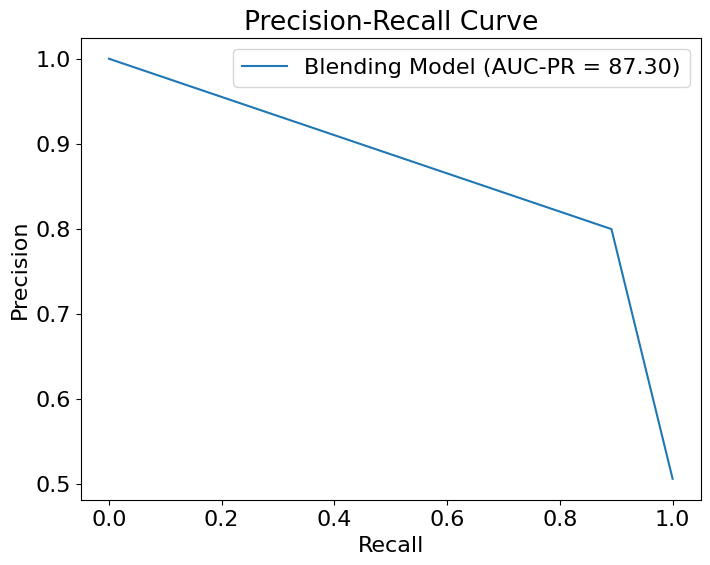

In [46]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Make predictions on the test set using base models
test_preds = []
for model in base_models:
    test_pred = model.predict(x_test)
    test_preds.append(test_pred)

test_pred_df = pd.DataFrame(test_preds).T
stock_test = pd.concat([x_test.reset_index(drop=True), test_pred_df], axis=1)

# Convert feature names to strings
stock_test.columns = stock_test.columns.astype(str)

# Get predictions from the meta model
meta_predictions = meta_model.predict(stock_test)

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, meta_predictions)

# Calculate AUC score
auc_pr_blending = round(auc(recall, precision) * 100, 2)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Blending Model (AUC-PR = %.2f)' % auc_pr_blending)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


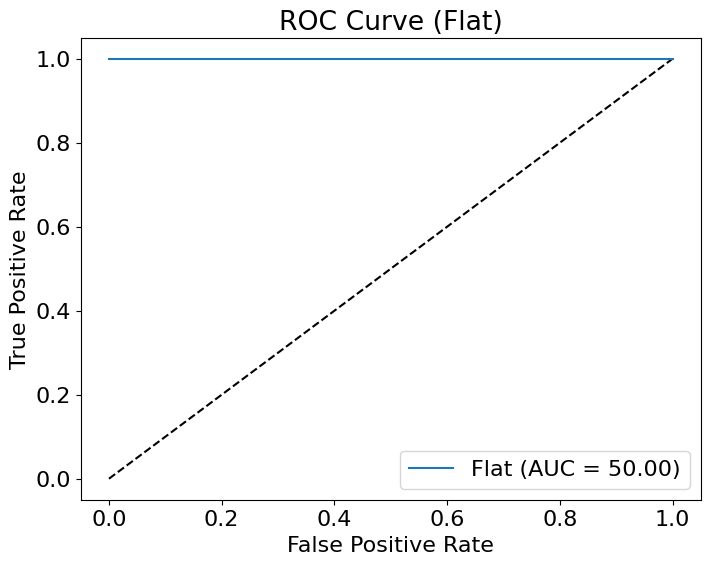

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Create constant predictions for the blending model
constant_pred = np.ones(len(y_val))  # Set all predictions to 1

# Calculate AUC score
auc_blend = round(roc_auc_score(y_val, constant_pred) * 100, 2)

# Plot flat ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')  # random curve
plt.plot([0, 1], [1, 1], label='Flat (AUC = %.2f)' % auc_blend)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Flat)')
plt.legend()
plt.show()


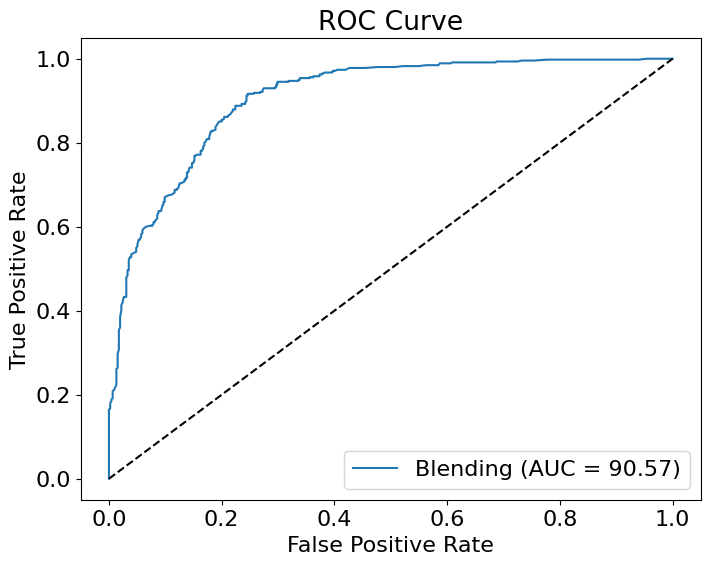

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train the base models and make predictions on the validation set
val_preds = []
for model in base_models:
    model.fit(x_train, y_train)
    val_pred = model.predict(x_val)
    val_preds.append(val_pred)

# Combine the predictions with the input features
val_pred_df = pd.DataFrame(val_preds).T
stock_val = pd.concat([x_val.reset_index(drop=True), val_pred_df], axis=1)

# Convert feature names to strings
stock_val.columns = stock_val.columns.astype(str)

# Train the meta model on the combined predictions and get probabilities
meta_model = AdaBoostClassifier()
meta_model.fit(stock_val, y_val)
probas = meta_model.predict_proba(stock_val)[:, 1]

# Plot ROC curve for the blending model
fpr_blend, tpr_blend, thresholds_blend = roc_curve(y_val, probas)
auc_blend = round(roc_auc_score(y_val, probas) * 100, 2)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_blend, tpr_blend, label='Blending (AUC = %.2f)' % auc_blend)

plt.plot([0, 1], [0, 1], 'k--')  # random curve

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predicted labels on test set
y_pred = meta_model.predict(stock_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.794921875
Recall: 0.8828633405639913
F1 Score: 0.8365878725590957


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
    f1_score, matthews_corrcoef, cohen_kappa_score, hamming_loss, \
    jaccard_score, classification_report, confusion_matrix

# Get predicted labels on test set
t1=time.time()
y_pred = meta_model.predict(stock_test)
t2=time.time()
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate macro-average recall
recall = recall_score(y_test, y_pred, average='macro')

recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1_score = f1_score(y_test, y_pred)
print("f1 score:", f1_score)

# Calculate sensitivity (True Positive Rate)
tp = confusion_matrix(y_test, y_pred)[1, 1]
fn = confusion_matrix(y_test, y_pred)[1, 0]
sensitivity = tp / (tp + fn)

# Calculate specificity (True Negative Rate)
tn = confusion_matrix(y_test, y_pred)[0, 0]
fp = confusion_matrix(y_test, y_pred)[0, 1]
specificity = tn / (tn + fp)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
# auc scores
auc_blend = roc_auc_score(y_test, y_pred)
print("auc :", auc_blend)
# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)

# Calculate Hamming Loss
hamming_loss = hamming_loss(y_test, y_pred)

# Calculate Jaccard Distance
jaccard_distance = 1 - jaccard_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Macro-average Recall:", recall)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("MCC:", mcc)
print("Cohen's Kappa:", kappa)
print("Hamming Loss:", hamming_loss)
print("Jaccard Distance:", jaccard_distance)
ExecutionTime =str(round((t2-t1)/len(y_test)*1000000,5))
print("Execution Time: ", ExecutionTime)

Recall: 0.8828633405639913
f1 score: 0.8365878725590957
auc : 0.8247650036153289
Accuracy: 0.8254665203073546
Precision: 0.794921875
Macro-average Recall: 0.8828633405639913
Sensitivity: 0.8828633405639913
Specificity: 0.7666666666666667
MCC: 0.6545374660388046
Cohen's Kappa: 0.6504094473366011
Hamming Loss: 0.17453347969264543
Jaccard Distance: 0.28091872791519434
Execution Time:  17.94159


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

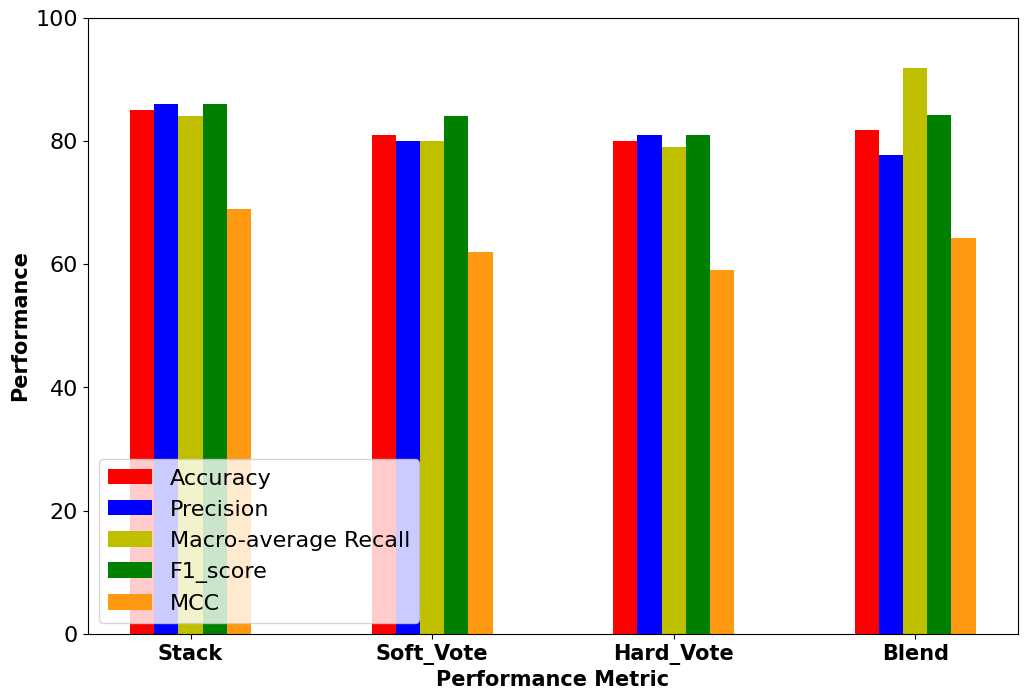

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Example values for the performance metrics
Accuracy_stack = 85.00
Accuracy_votesoft = 81.00
Accuracy_votehard = 80.00
Accuracy_blend= 81.81

Precision_stack = 86.00
Precision_votesoft = 80.00
Precision_votehard = 81.00
Precision_blend = 77.76

macro_recall_stack = 84.00
macro_recall_votesoft = 80.00
macro_recall_votehard= 79.00
macro_recall_blend = 91.86

f1_score_stack = 86.00
f1_score_votesoft = 84.00
f1_score_votehard= 81.00
F1_score_blend= 84.22

mcc_stack= 69.00
mcc_votesoft= 62.00
mcc_votehard = 59.00
mcc_blend= 64.32


# set width of bar
barWidth = 0.10
fig = plt.subplots(figsize=(12, 8))

# set height of bar
y = [Accuracy_stack, Accuracy_votesoft, Accuracy_votehard, Accuracy_blend]
y1 = [Precision_stack, Precision_votesoft, Precision_votehard, Precision_blend]
y2 = [macro_recall_stack, macro_recall_votesoft, macro_recall_votehard, macro_recall_blend]
y3 = [f1_score_stack, f1_score_votesoft, f1_score_votehard, F1_score_blend]
y4 = [mcc_stack, mcc_votesoft, mcc_votehard, mcc_blend]

# Set position of bar on X axis
br1 = np.arange(len(y))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Make the plot
plt.bar(br1, y, color='r', width=barWidth, label='Accuracy')
plt.bar(br2, y1, color='b', width=barWidth, label='Precision')
plt.bar(br3, y2, color='y', width=barWidth, label='Macro-average Recall')
plt.bar(br4, y3, color='g', width=barWidth, label='F1_score')
plt.bar(br5, y4, color='#FF9912', width=barWidth, label='MCC')

# Adding Xticks
plt.xlabel('Performance Metric', fontweight='bold', fontsize=15)
plt.ylabel('Performance', fontweight='bold', fontsize=15)

bars = ('Stack', 'Soft_Vote', 'Hard_Vote','Blend')
plt.xticks(br1 + barWidth*2, bars, color='black', fontweight='bold', fontsize='15')

plt.ylim([0, 100])
plt.legend(loc='lower left')

# Save the plot as a PDF file
plt.savefig("performance_metrics.pdf", format='pdf')

# Download the PDF file
files.download("performance_metrics.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

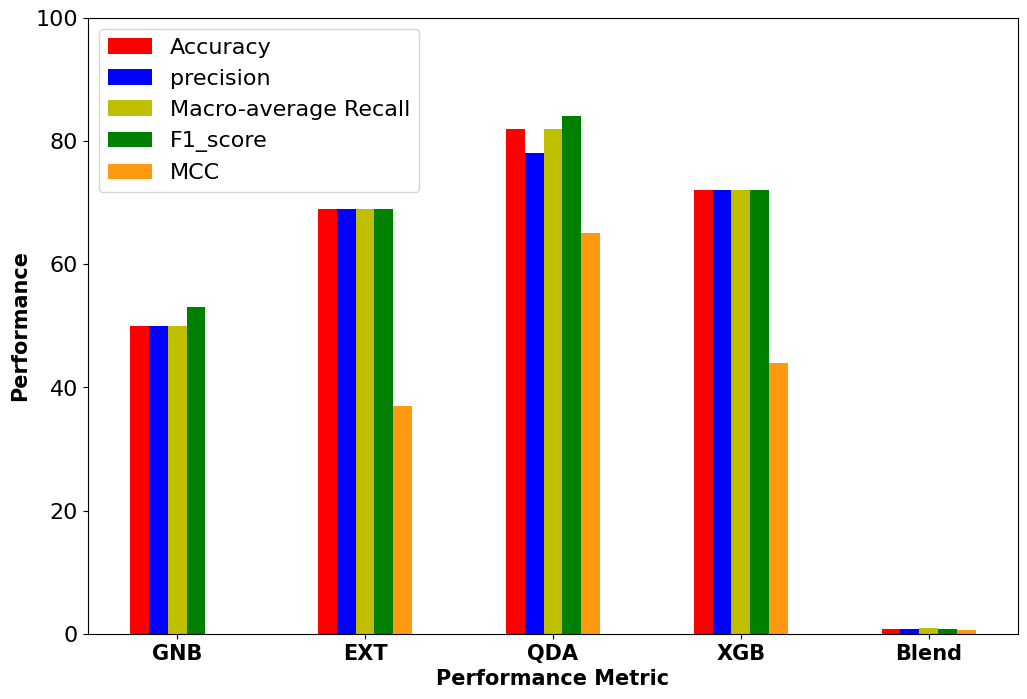

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# set width of bar
barWidth = 0.10
fig = plt.subplots(figsize =(12, 8))
allmod=fig

# set height of bar
y = [Accuracy_nb, Accuracy_ext, Accuracy_qda, Accuracy_xgb, accuracy]
y1 = [Precision_nb, Precision_ext, Precision_qda, Precision_xgb, precision]
y2 = [macro_recall_gnb, macro_recall_ext, macro_recall_qda, macro_recall_xgb, recall]
y3 = [f1_score_nb, f1_score_ext, f1_score_qda, F1_score_xgb, f1_score]
y4 = [mcc_nb, mcc_ext, mcc_qda, mcc_xgb, mcc]


# Set position of bar on X axis
br1 = np.arange(len(y))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Make the plot
plt.bar(br1, y, color='r', width=barWidth, label='Accuracy')
plt.bar(br2, y1, color='b', width=barWidth, label='precision')
plt.bar(br3, y2, color='y', width=barWidth, label='Macro-average Recall')
plt.bar(br4, y3, color='g', width=barWidth, label='F1_score')
plt.bar(br5, y4, color='#FF9912', width=barWidth, label='MCC')

# Adding Xticks
plt.xlabel('Performance Metric', fontweight='bold', fontsize=15)
plt.ylabel('Performance', fontweight='bold', fontsize=15)

bars = ('GNB', 'EXT', 'QDA', 'XGB', 'Blend')
plt.xticks(br1 + barWidth*2, bars, color='black', fontweight='bold', fontsize='15')

plt.ylim([0, 100])
plt.legend()

# Save the plot as a PDF file
plt.savefig("performance_metrics.pdf", format='pdf')

# Download the PDF file
files.download("performance_metrics.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

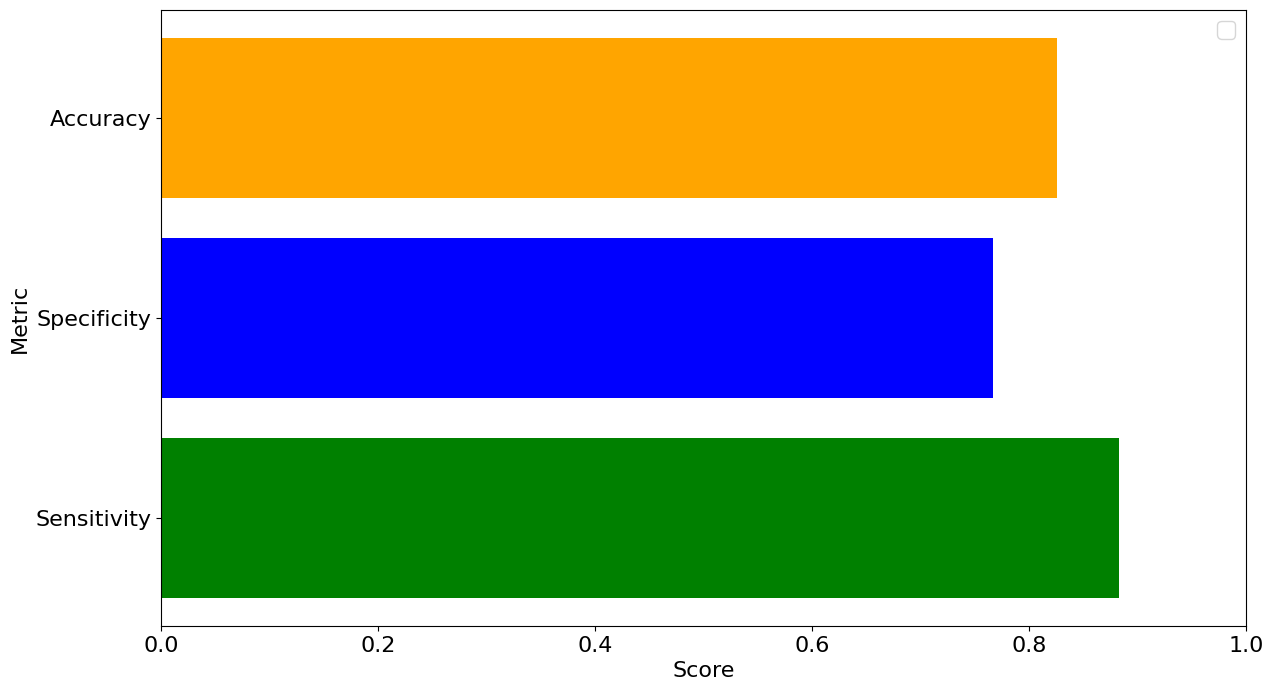

In [53]:
import matplotlib.pyplot as plt
from google.colab import files
# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(14, 8))
allmod=fig
metrics = ['Sensitivity', 'Specificity', 'Accuracy']
values = [sensitivity, specificity,accuracy]

plt.barh(metrics, values, color=['green', 'blue', 'orange'])
plt.xlim([0,1])
plt.legend()
plt.xlabel('Score')
plt.ylabel('Metric')

# Save the plot as a PDF file
plt.savefig("Blend_performance.pdf", format='pdf')

# Download the PDF file
files.download("Blend_performance.pdf")


In [54]:
from sklearn.metrics import accuracy_score
import numpy as np

y_test = np.array(y_test)
predictions = np.array(y_pred)
moving_direction_y_test = np.sign(np.diff(y_test))
moving_direction_predictions = np.sign(np.diff(predictions))
moving_direction_accuracy = accuracy_score(moving_direction_y_test, moving_direction_predictions)
# Print the moving direction accuracy
print("Moving Direction Accuracy: {:.2%}".format(moving_direction_accuracy))

Moving Direction Accuracy: 67.58%


In [55]:
import numpy as np

mean_accuracy = np.mean(y_test == y_pred)
print("Mean Prediction Accuracy: {:.2%}".format(mean_accuracy))

Mean Prediction Accuracy: 82.55%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Precision-Recall Curve')

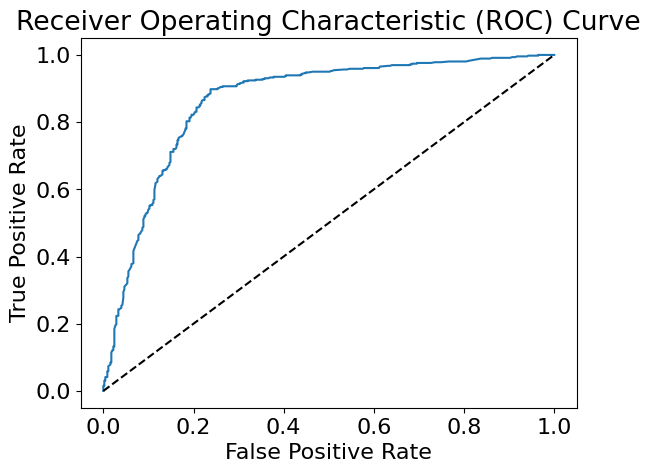

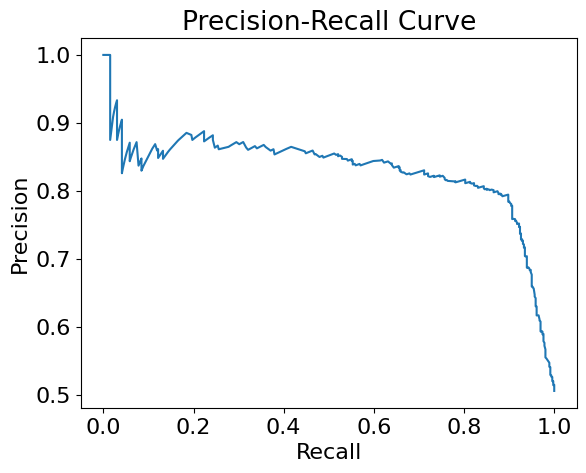

In [56]:
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.metrics import roc_curve, precision_recall_curve, plot_confusion_matrix, ConfusionMatrixDisplay

# Compute predicted probabilities for the positive class
y_pred_proba = meta_model.predict_proba(stock_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)

# Compute precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Save the plot as a PDF file
plt.savefig("Receiver Operating Characteristic (ROC) Curve.pdf", format='pdf')

# Download the PDF file
files.download("Receiver Operating Characteristic (ROC) Curve.pdf")
# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Save the plot as a PDF file
# plt.savefig("Precision-Recall Curve.pdf", format='pdf')

# Download the PDF file
# files.download("Precision-Recall Curve.pdf")

In [60]:
import pandas as pd

class_counts = pd.Series(y).value_counts()
print('Class counts:\n', class_counts)


Class counts:
 50.000000    1
69.000000    1
82.000000    1
72.000000    1
0.825467     1
dtype: int64


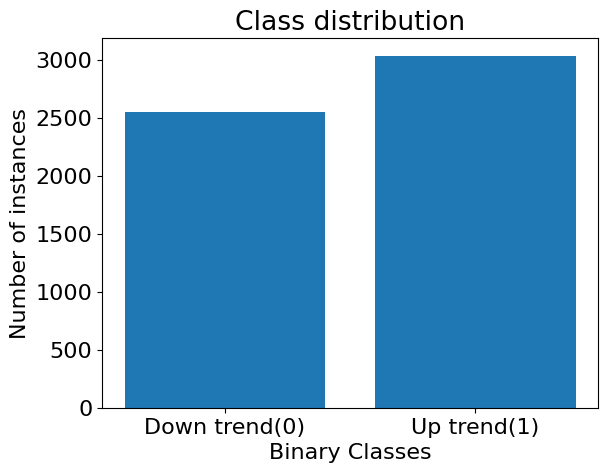

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
import matplotlib.pyplot as plt

# Assuming class_counts is the data for the bar plot
class_counts = {0: 2545, 1: 3034}

# Plot the bar chart
plt.bar(class_counts.keys(), class_counts.values())

# Set the x-axis tick positions and labels
plt.xticks(list(class_counts.keys()), ['Down trend(0)', 'Up trend(1)'])

# Set the x-axis label and title
plt.xlabel('Binary Classes')
plt.ylabel('Number of instances')
plt.title('Class distribution')

# Save the plot as a PDF file
plt.savefig("class_distribution.pdf", format='pdf')

# Show the plot
plt.show()
from google.colab import files
files.download("class_distribution.pdf")


In [70]:
y_test.shape

(911,)

In [71]:
predictions.shape

(911,)

In [75]:
# import necessary libraries
from sklearn.metrics import confusion_matrix

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# extract true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) from the confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# print the results
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 407
True Negatives: 345
False Positives: 105
False Negatives: 54
